## <font color = grey>What are features?

Look for the regions in images which have maximum variation when moved (by a small amount) in all regions around it. This would be projected into computer language in coming chapters. So finding these image features is called Feature Detection.

# SIFT (Scale - Invariant Feature Transform) 

SIFT, a distinctive Image Features from Scale-Invariant Keypoints, extracts keypoints and compute its descriptors. It is a worldwide reference for image alignment and object recognition.

If you want to match two image successfully, you have to find some distinct or unique properties that will help you to find what you are looking for. These are called "Features" in pattern recognition/image processing environments. 

<img src="https://i.stack.imgur.com/SEziz.jpg" alt="SIFT Matching">

In Iris recognition case, for example, you will need scale, illuminance and rotation invarient features. SIFT features will be the best candidate for this work. Therefore, extract SIFT features of iris images and store them to the database. 

**Setup**
- open Anaconda Prompt
- Downgrade Python version by typing "conda install python=3.5
- Type "conda install -c menpo opencv3"

**URL to images used in this exercise:** (download in the same directory with the notebook)

- NUS Logo: https://www.edumaritime.net/images/stories/nus-singapore.png
- NUS T-shirt: https://images-na.ssl-images-amazon.com/images/I/61tBveLt-2L._UL1500_.jpg

### Generating SIFT features in Python OpenCV

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print ('OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):')
print (cv2.__version__)

# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
nus_logo = cv2.imread('nus.jpg')
nus_tshirt = cv2.imread('nus_tshirt.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
3.1.0


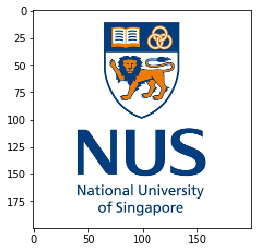

In [3]:
show_rgb_img(nus_logo);

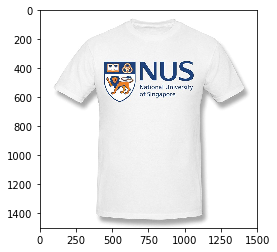

In [4]:
show_rgb_img(nus_tshirt);

### Convert image into grayscale 

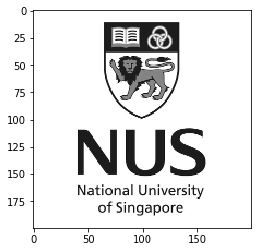

In [5]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

nus_logo_gray = to_gray(nus_logo)
nus_tshirt_gray = to_gray(nus_tshirt)

plt.imshow(nus_logo_gray, cmap='gray');

Here are what our SIFT features look like for the nus_logo image:


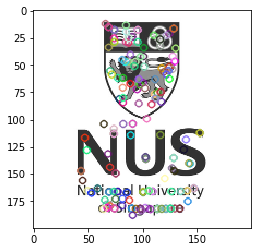

In [6]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
nus_logo_kp, nus_logo_desc = gen_sift_features(nus_logo_gray)
nus_tshirt_kp, nus_tshirt_desc = gen_sift_features(nus_tshirt_gray)

print ('Here are what our SIFT features look like for the nus_logo image:')
show_sift_features(nus_logo_gray, nus_logo, nus_logo_kp);

As you can see, all of the key points have been detected.

### Visualize how the SIFT features match up each other across the two images.

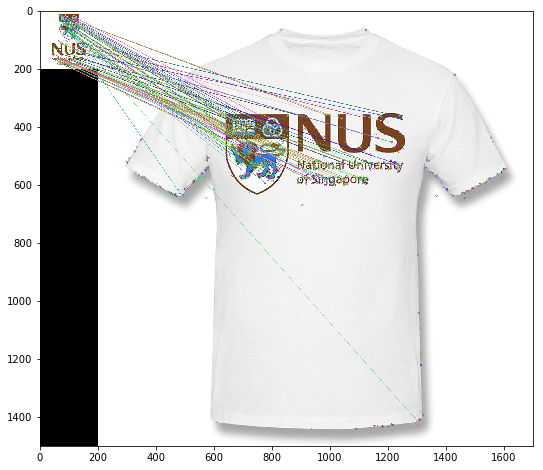

In [7]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(nus_logo_desc, nus_tshirt_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    nus_logo, nus_logo_kp,
    nus_tshirt, nus_tshirt_kp,
    matches[:N_MATCHES], nus_tshirt.copy(), flags=0)

plt.figure(figsize=(12,8))
plt.imshow(match_img);